In [145]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
# import regression package


# Levering up and Shorting

So far we wrote the portfolio return as simple product of weights and individual asset returns

$$r^p_t=W_tR_t+(1-\sum_i^Iw_i)r^f_t$$

where $R$ is a a vector of riksy asset returns.

In practice things are not quite as simple. 

First lets discuss what happens as $(1-\sum_i^Iw_i)$ goes from a number between 0 and 1 to a a negative number.  meaning you have a positive fraction allocated to the risk-free asset to a negative number.

The case when this is above 1 is not very relevant as it would imply you are shorting the risky assets to invest more in the risk-free asset, which typically has much lower expected returns.

**Leverage**

When $(1-\sum_i^Iw_i)\in[0,1]$ you have a postive fraction of your portfolio in the risk-free asset. In this case you earn something close to the 3 month t-bill rate. In practice it can be a tiny bit higher or a tiny bit lower if you park the money in a money market fund account in your broker. Of course you can literally just buy the t-bill if you want so the rate that you earn will be pretty close to the tbill rate.  

You can easily get this t-bill rate [from FRED](https://fred.stlouisfed.org/series/DTB3). Of course you can use the API and get this data quickly by using it's name `DTB3`.

When $(1-\sum_i^Iw_i)<0$ you have a negative weight on the risk-free asset. It means that you are borowing money to invest more in the risky assets, mechanically $\sum_i^Iw_i>1$. 

What happens in this case?

* No one will lend you money at the same rate the US gov get to borrow! They get to borrow at the lowest USD rates out there!

* in practice it will depend on how large your portfolio is and your broker

* here are the [lending rates of a big retail broker](https://www.interactivebrokers.com/en/index.php?f=46376)
* Here is snapshot from May/2021

![image.png](../../assets/plots/leverageandshorting1.jpg)

* The structure of the rate is the following

$$r^b_t=r^{benchmark}_t+spread$$

* The benchmark is something that is very close to the treasury rate


* Here what your portfolio looks like

$$r^p_t=W_tR_t+\max(1-\sum_i^Iw_i,0)r^f_t+\min(1-\sum_i^Iw_i,0)r^b_t$$

* so you earn rf is weight on the rf is positive, but pay rb if the weight is negative. Can rewrite as

$$r^p_t=W_tR_t+(1-\sum_i^Iw_i)r^f_t+\min(1-\sum_i^Iw_i,0)spread_t$$


* so the spread compensate the broker for the risk it bears by lending to you instead of lending to the US government

* The key difference if that when you lend to the US goverment you give then the money and a promise to pay back, the tbill which only has value if they indeed pay you back

* The broker when it lends to you will not take these chances, so your loan will be backed by the assets in your portfolio

* this mean there will be a limit on your leverage. Typically this takes the following form 

   - $\sum_i^Iw_i\leq 1/m_{initial}$ and $\sum_i^Iw_i<1/m_{maintenance}$ with  $1/m_{maintenance}>1/m_{initial}$
   
   - For US retail investors $m_{initial}=0.5$ and $m_{maintenance}$ varies a bit

* here is for a US retial broker. Focus on the top row, 50% initial , 30% maintenance, which translates to 1/0.5=2 initial leverage and 1/0.3=2.33 maintenance leverage  

![image.png](../../assets/plots/leverageandshorting2.jpg)
   
**Example**

lets say  $m_{initial}=0.5$ and $m_{maintenance}=0.3$. Say you have 100k in your brokerage account and you can buy up to 200K in stocks. The broker lends to you 100k and hold the whole 200k in assets as protection. The value of your networth is still 100k. 200k in stocks -100k in the risk-free asset. For simplicity lets assume the risk-free rate is zero in this example.

  * Say your risk portfolio drops 30%, what is yout networth? risky portfolio 200*(-0.3+1)=140k, minus the 100k, you are now worth 140-100=40
  * This should not be surprising: You must absorb the entire loss
  * What is you risk-asset weight and how much you are borrowing as fraction of your worth?

In [48]:
(140/40,100/40)


(3.5, 2.5)

  * your leverage went from 2 to 3.5
  * You now have only 40/140=0.28% on marign
  * you are violating the maintenance constraint, which is 30%. What happens now?
  * your prime broker will ask for cash so you get back to 30% 
  * To keep your 140 position you need to have 140\*0.3=42 networth so you need to inject 42-40=2k. 



* What happens if you don't inject the cash in time? 
     - This situation tends to be representative as you likely don't have spare cash otherwise you would not be levering up
     - But it is possible that you have other assets that you can sell/borrow against
* You will simply reduce your position in the risky asset to get back to the limit
* This means that margin have to come down to $0.3\times x=40$ and therefore you have to sell 140-40/0.3=140-133=7k  of your risky asset position

**Fire Sales**

* If you don't do it your broker will certainly sell fro you and  might even liquidiate your entire position
* for example, here is from a retail broker

![image.png](../../assets/plots/leverageandshorting3.jpg)


* When the position to be sold is large, this can lead to very sharp price movements
* The dealers does not care at all about the price that he sells for as long he can get his money
   - For example, back in March 2021 brokers liquidated a 21 billion dollar portfolio when the family office could not meet the margin call, i.e., the demand for cash. See, [inside-archegoss-epic-meltdown](https://www.wsj.com/articles/inside-archegoss-epic-meltdown-11617323530)
  

**Other leverage constraints**

* In futures market, swap markets, and option markets you can get implicit leverage, often substantially more than in the cash market
* It will vary wildly from market to market and in OTC markets this will depend on the relationship you have with your broker

* For example the Achelegos fund was leveraged 10 to 1, so for each 1 dollar o networth they had 10 dollars of risky assets

* Often this leverage constraint is given by sometype of risk-management at the portfolio level

* For example, it is typical to make the amount of leverage that you can get to depend on your portfolio volatility

$$l_t\leq c\sigma_t(r_p)$$

* This means that if volatilitiy goes up at the same time as your assets go down in value, as it typically happens, you face demand in cash both from your losses buy also from a reduction in your leverage limits

**Aplication: All in on Tesla**

Jackie is a complete believer on Tesla and decide to all here savings, 1 Million dollars on Tesla in early 2017, and lever up to the maximum allowed by it's broker to 50%, so a total position of 1.5 million dollars that she commited to stick with it. broker changed 1% on top of the tbill rate which was at zero.

The broker made clear that a fraction of the tesla shares would have to sold everytime leverage went above 80%. The amount sold would have to bring the account leverage back to 50%.

> What would happen if JAckie was evne more commited and kept relveraging her account back to 50% everytime it dropped below 40%

In [148]:
# lets start by loading TESLA daily returns
import wrds
import psycopg2 
conn=wrds.Connection()






Enter your WRDS username [Alan.Moreira]: moreira5
Enter your password: ···········


WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


We will now do a for loop that simulates the dealer margin re-balancing strategy

In [149]:
# we will no use the wrds function we created in out codesnipets file
from codesnippets import get_returns_daily 

df=get_returns_daily(['TSLA'],conn,'1/1/2017','1/1/2022')

val=1000000 # inital portfolio value

rl=0.01/252 #borrowing spread
linitial=0.5 # Initial margin
lmax=0.3 # minimum margin
lmin=0 # Minimum leverage before you rebalance back to some target leverage. If set to zero, no rebalancing
ltarget=1.5 # target leverage (set to initiaL if desired is higher than initial)
w0=np.array([[ltarget,1-ltarget]])*val # initiate  portfolio at the target leverage
W=pd.DataFrame(w0,index=[df.index[0]],columns=['Asset','rf']) # containet to store  portfolio overtime

for d in df.index[1:]:
    w0=(1+np.array([[float(df.loc[d].values),rl]]))*w0 # update portfolio position given relaized return
    if np.sum(w0)<0:
        W.at[d,'Asset']=w0[0][0]
        W.at[d,'rf']=w0[0][1]
        break
    if w0[0][1]/np.sum(w0)<-1/lmax:
        w0=np.sum(w0)*np.array([[1/linitial,-1/linitial+1]])
    elif w0[0][1]/np.sum(w0)>-lmin:
        w0=np.sum(w0)*np.array([[ltarget,1-ltarget]])     
    W.at[d,'Asset']=w0[0][0]
    W.at[d,'rf']=w0[0][1]
        

Text(0.5, 1.0, 'vol')

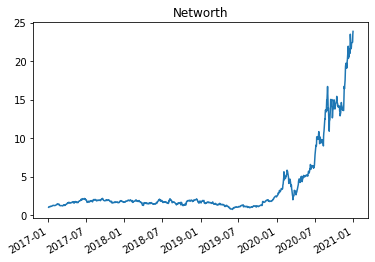

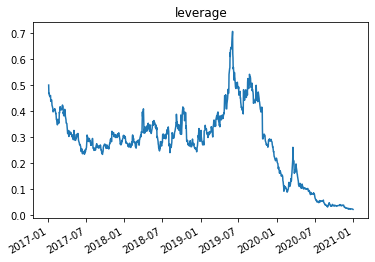

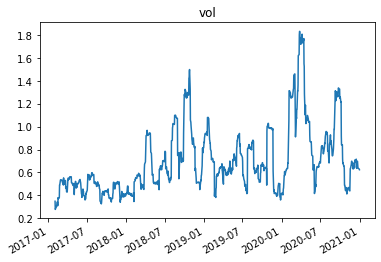

In [108]:
(W['2017':'2020'].sum(axis=1)/1e6).plot(logy=False)
#(W['2017':'2020']['Asset']/1e6).plot(logy=False)
plt.title('Networth')
plt.figure()
(-W['2017':'2020']['rf']/W['2017':'2020'].sum(axis=1)).plot()
plt.title('leverage')
plt.figure()
((W['2017':'2020'].sum(axis=1)).pct_change().rolling(window=21).std()*252**0.5).plot()
plt.title('vol')

**Shorting**

Shorting is conceptually very similar to leverage. You borrow an asset and pay some lending fee to borrow it (perhaps this fee will be zero if there is ample supply). And of course once you borrow you immediately sell and get the cash from the sale. The broker facilitating this transaction will typically ask you to  keep some margin in you account. 

We see in the top line of the margin requirement numbers that the margin requirements for shorting is set to 50% with the maintenance at 30%. For shorting I find it easier to think in terms of margin. So this says that you need to have 50% of the value of your short position to start the trade, but this can go down to up to 30%.

* This means that if you have 1 million in cash you can short at most 2 million of apple stock 

* you actually earn interest on this 3 million, but paying the lending fee on the 2 million borrowed stock

* here what your returns look like for shorting stock i 

$$w\times r^i_t+(1-w)r^f+\min(w,0)sf^i$$

* where inital margin constraint  implies that |w| has to be lower than 2.

* and after the trade is initated is cannot go above 1/0.3

**How does this work for a long-short trade?**

Suppose you want to a "market netural trade where you buy 1M worth of different fintech stocks and short 1M worth of banks. How mucy capital do you need?

* to initiate the long-trade you will need 500k, 50% margin on 1M position

* same thing for the short position, you will need 500 to satisfy the 50% marging

* So in the end your portfolio looks like (+1M Fintech,-1M Banks, 1M treasuries)

* so your 1 Million dollar still earns the risk-free rate

* so for someone that can fund themselves at the risk-free rate-- or have money parked in treasuries anyways, the lond-short is costless as we modeled

* In practice most arbitrageurs have the bear minimum in treasuries and have a much higher cost of funding then treasuries

**Shorting fees**

* In the expression above $sf^i$ is the shorting fee you pay per period to short, which typically is quoted in annualized terms and can change briskly over time.

* Here is a snapshort of the fee to borrow GME stock early this year (the borrowing rate is in red)

![image.png](../../assets/plots/leverageandshorting4.jpg)



* A full portfolio looks like (here I am assuming you don't lever up)

$$\sum_i^I w^i\times r^i_t+(1-\sum_i^I w^i)r^f_t+\sum_i^I\min(w^i,0)sf^i_t+\min(1-\sum_i^Iw_i,0)spread_t$$

* Where $\sum_i^I |w^i|\leq 1/m_{initial}$

**Application: Shorting GME**

Now consider a big unconsitraiend hedge fund that started shorting GME early 2020. We will now assume that they jsut inject cash as nedded in the trade. We will then track their capital commited to the trade and their dollar "P&L" , i.e the dollars profits/losses of the trade.

We will start assuming shorting fee is zero

In [141]:
df=get_returns_daily(['GME'],conn,'1/1/2020','1/1/2022')

val=1000000 # inital portfolio value
sf=0/252# shorting fee
rf=0/252 # tbill
linitial=0.5 # Initial margin
lmax=0.3 # minimum margin
w0=np.array([[-1/linitial,1+1/linitial]])*val # initiate  portfolio at the target leverage
W=pd.DataFrame(w0,index=[df.index[0]],columns=['Asset','rf']) # container to store  portfolio overtime
Capital=pd.DataFrame(val,index=[df.index[0]],columns=['capital'])


for d in df.index[1:]:
    w0[0][1]=w0[0][1]+w0[0][0]*sf
    w0=(1+np.array([[float(df.loc[d].values),rf]]))*w0# update portfolio position given relaized return
    
    Capital.at[d,'capital']=0
    if np.sum(w0)<np.abs(w0[0][0])*lmax :
        Capital.at[d,'capital']=(-w0[0][0]*lmax-np.sum(w0)) # how mcuh capital is injected in the trade
        w0[0][1]=w0[0][1]+(-w0[0][0]*lmax-np.sum(w0)) # change in the risk-free positions
    elif np.sum(w0)>np.abs(w0[0][0])*lmax :
        Capital.at[d,'capital']=(-w0[0][0]*lmax-np.sum(w0)) # how much capital is released of the trade
        w0[0][1]=w0[0][1]+(-w0[0][0]*lmax-np.sum(w0))    # change in the risk-free positions
  
    W.at[d,'Asset']=w0[0][0]
    W.at[d,'rf']=w0[0][1]
        

Text(0.5, 1.0, 'vol')

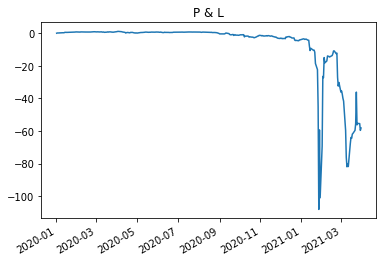

<Figure size 432x288 with 0 Axes>

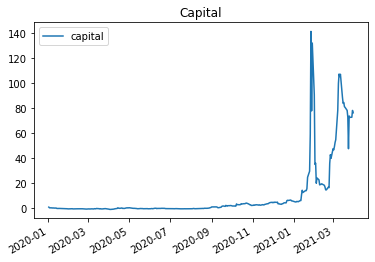

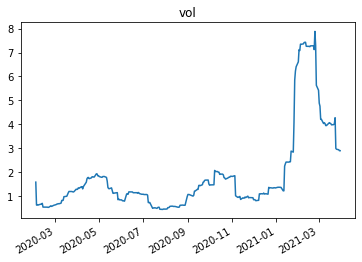

In [142]:
(W.sum(axis=1)/1e6).subtract((Capital.capital/1e6).cumsum(),axis=0).plot(logy=False)
#(W['2017':'2020']['Asset']/1e6).plot(logy=False)
plt.title('P & L')
plt.figure()
(Capital/1e6).cumsum().plot(logy=False)
#(W['2017':'2020']['Asset']/1e6).plot(logy=False)
plt.title('Capital')
plt.figure()

((W.sum(axis=1)).pct_change().rolling(window=21).std()*252**0.5).plot()
plt.title('vol')

Suppose you were a hedge fund with 200M capital, you placed a fairly small 1 million dollar trade. You were fully commited and thoguht you had the cpaital to support it.

By late january sustaining the trade required 140 million dollars! And this does not take into account the fact that margin requirements became much tighter du to the immense volatiltiy of GME stock in the period.

* You can see above that the volatiltiy of the fund net position went to 800%!

* This is 50% daily volatility!

* A two standard deviaiton event would wipe out your margin!

* As response to this retail brokers increase margin requirements on GME shorts to 300%

* I am not sure what institutional brokers did, but likely they increased their leverage reuqirements too.

* This implies required capital would increase 6 fold going from 140 to 840 Million dollars

* 840 million dollars to sustain the 1 million dollars trade!





In [144]:
8/252**0.5

0.5039526306789696